In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import bokeh.plotting as blt
import math
import fit_pendulum_data as p1
import midpoint_vec as p2
import Lagrange_poly1 as p3
import Lagrange_poly2 as p4

# Homework 2
Michael Seaman
2/14/16

## Problem 5.18
### Polynomial fitting to expirimental data

fit_pendulum_data.py has 2 functions defined for it. The first, the retrieve function finds the file pendulum.dat and gets 2 lists of values: one of Pendulum lengths and one of their periods. They are plotted below.

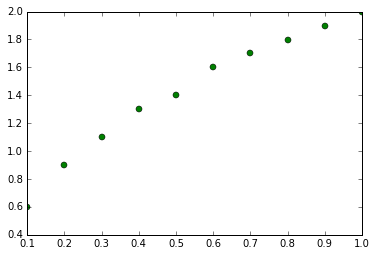

In [2]:
p_data = p1.retrieve_pendulum_data()
plt.plot(p_data[0],p_data[1],'go')

plt.show()

The second method defined fits a polynomial curve to the data points and then plots it. Here we will try a 1, 2, and 3, degree polynomial.

Fitted Curve of degree 1: 
 
1.485 x + 0.6133
Fitted Curve of degree 2: 
        2
-1.023 x + 2.61 x + 0.3883
Fitted Curve of degree 3: 
       3         2
1.068 x - 2.786 x + 3.423 x + 0.2967


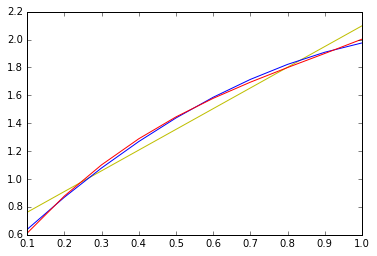

In [3]:
p_data = p1.retrieve_pendulum_data()
fit1 = p1.pendulum_fit(p_data[0],p_data[1],1)
plt.plot(fit1[0],fit1[1],'y')
fit2 = p1.pendulum_fit(p_data[0],p_data[1],2)
plt.plot(fit2[0],fit2[1],'b')
fit3 = p1.pendulum_fit(p_data[0],p_data[1],3)
plt.plot(fit3[0],fit3[1],'r')

plt.show()

And plotted with the data points, we can clearly see that the cubic fit is the most accurate. 

Fitted Curve of degree 1: 
 
1.485 x + 0.6133
Fitted Curve of degree 2: 
        2
-1.023 x + 2.61 x + 0.3883
Fitted Curve of degree 3: 
       3         2
1.068 x - 2.786 x + 3.423 x + 0.2967


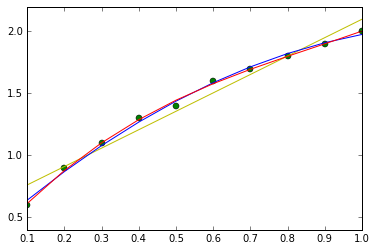

In [4]:
p_data = p1.retrieve_pendulum_data()
plt.plot(p_data[0],p_data[1],'go')
fit1 = p1.pendulum_fit(p_data[0],p_data[1],1)
plt.plot(fit1[0],fit1[1],'y')
fit2 = p1.pendulum_fit(p_data[0],p_data[1],2)
plt.plot(fit2[0],fit2[1],'b')
fit3 = p1.pendulum_fit(p_data[0],p_data[1],3)
plt.plot(fit3[0],fit3[1],'r')

plt.show()

## Problem 5.22 Vectorizing the Midpoint Integration

In this excercise, we have 3 implementations of the Midpoint rule for integration:
$$\int_{a}^{b}f(x)dx\approx h \sum_{i=1}^{n}f(a + \frac{h}{2} + ih)$$
where h = (b-a)/n
The three implementations differ in which summation function they use. The first is simply a python for loop that iterates over the values and summates them all gradually.


In [5]:
def f(x):
    return x**3 - 15*x

print(p2.midpointint(f, 0, 10, 1000))
%timeit p2.midpointint(f, 0, 10, 1000)

1749.99875
The slowest run took 9.00 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 775 µs per loop


Next employs the built-in python sum() function to do the same thing.

In [6]:
print(p2.midpointint_python_sum(f, 0, 10, 1000))
%timeit p2.midpointint_python_sum(f, 0, 10, 1000)

1749.99875
1000 loops, best of 3: 879 µs per loop


Finally, the use of numpy's sum() function:

In [7]:
print(p2.midpointint_numpy_sum(f, 0, 10, 1000))
%timeit p2.midpointint_numpy_sum(f, 0, 10, 1000)

1749.99875
1000 loops, best of 3: 762 µs per loop


## Problem 5.23 - 5.25 Implementing Lagrange's interpolation formula
Inorder to approximate points on given a set of data, we can fit a polynomial function passing through all the points and then evaulate it for new incoming inputs. This process is known as interpolation. Excercises 5.23 - 5.25 use Lagrange's interpolation formula - finding a polynomial that can be written as:

$$p_L(x) = \sum_{k=0}^{n}y_kL_k(x) $$ where $$ L_k(x) = \prod_{i=0,i \neq k}^{n}\frac{x-x_i}{x_k - x_i}$$

Here we have 5 points plotted on $y = sin(x)$ from [0,$\pi$]:

In [8]:
xp = np.linspace(0, math.pi, 5)
sin_vectorized = np.vectorize(math.sin)
yp = sin_vectorized(xp)

print xp
print yp

[ 0.          0.78539816  1.57079633  2.35619449  3.14159265]
[  0.00000000e+00   7.07106781e-01   1.00000000e+00   7.07106781e-01
   1.22464680e-16]


Now we will use the polynomial approximator to guess the already existing points. It should return the exact values (or at least very very close). 

In [9]:
for i in xrange(len(xp)):
    print "p_L approximation: " + str(p3.p_L(xp[i], xp, yp))
    print "Actual: " + str(yp[i])
    

p_L approximation: 0.0
Actual: 0.0
p_L approximation: 0.707106781187
Actual: 0.707106781187
p_L approximation: 1.0
Actual: 1.0
p_L approximation: 0.707106781187
Actual: 0.707106781187
p_L approximation: 1.22464679915e-16
Actual: 1.22464679915e-16


Now we'll try the same thing, but now with graphing (5.24). First we graph sin(x) with its interpolated points

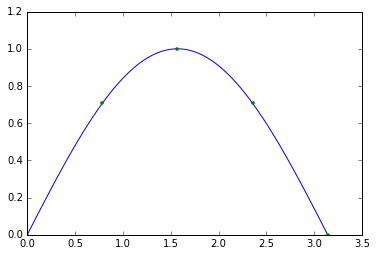

In [2]:
p4.graph(math.sin, 5, 0, math.pi)

Finally we investigate our newly created graph function for
$f(x) = |x| , x \in [-2, 2] $ with a total of 2, 4,6 10, 13, and 20 interpolation points. (5.25)


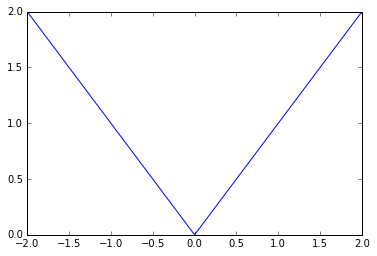

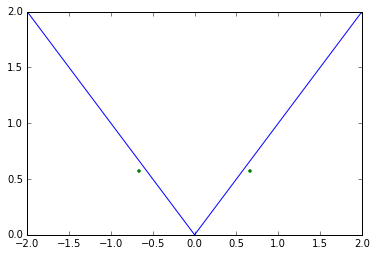

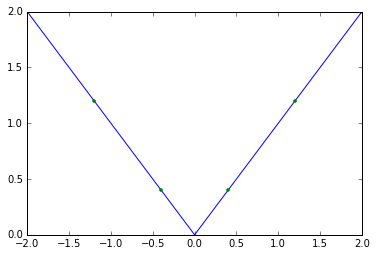

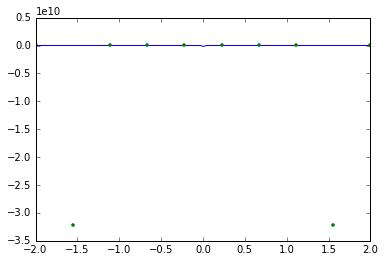

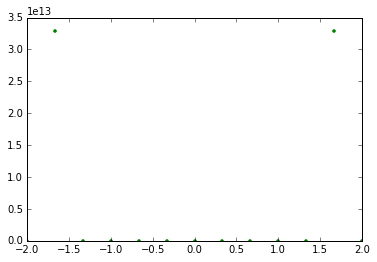

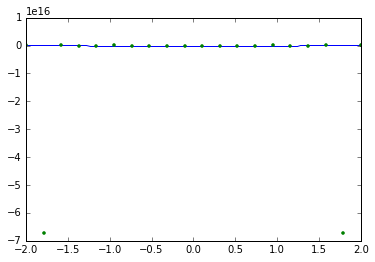

In [3]:
import Lagrange_poly2b